# Task 1 (A classification example: fetal heart condition diagnosis)
Classification Example

### 1-1
Reading data

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
  
# Read the CSV file.
data = pd.read_csv("assets/CTG.csv", skiprows=1)

# Select the relevant numerical columns.
selected_cols = ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
                 'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean',
                 'Median', 'Variance', 'Tendency', 'NSP']
data = data[selected_cols].dropna()

# Shuffle the dataset.
data_shuffled = data.sample(frac=1.0, random_state=0)

# Split into input part X and output part Y.
X = data_shuffled.drop('NSP', axis=1)

# Map the diagnosis code to a human-readable label.
def to_label(y):
    return [None, 'normal', 'suspect', 'pathologic'][(int(y))]

Y = data_shuffled['NSP'].apply(to_label)

# Partition the data into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

In [38]:
Xtrain.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency
1690,137.0,13.0,0.0,3.0,4.0,0.0,0.0,56.0,2.1,0.0,...,136.0,52.0,188.0,3.0,0.0,160.0,144.0,161.0,39.0,1.0
12,131.0,4.0,57.0,6.0,2.0,0.0,0.0,28.0,1.4,0.0,...,66.0,88.0,154.0,5.0,0.0,135.0,134.0,137.0,7.0,1.0
950,142.0,4.0,0.0,6.0,0.0,0.0,0.0,34.0,1.1,0.0,...,67.0,94.0,161.0,5.0,1.0,151.0,146.0,149.0,8.0,1.0
480,140.0,0.0,0.0,1.0,0.0,0.0,0.0,60.0,0.8,32.0,...,120.0,79.0,199.0,9.0,0.0,141.0,141.0,142.0,3.0,0.0
25,124.0,0.0,0.0,0.0,0.0,0.0,0.0,86.0,0.3,72.0,...,12.0,118.0,130.0,1.0,0.0,124.0,124.0,125.0,0.0,0.0


### 1-2
Baseline Classifers

In [39]:
import sklearn as SK
from sklearn.model_selection import cross_val_score
from sklearn import dummy
from sklearn import tree
from sklearn import ensemble
from sklearn import linear_model
from sklearn import neural_network
import warnings
from statistics import mean

def evalAndAppendClassifier(writedict, clf, suffix="", normalizeX=False, Xin=None, Yin=None):
    if Xin is None:
        Xin = Xtrain
    if Yin is None:
        Yin = Ytrain
    if normalizeX:
        Xin = SK.preprocessing.normalize(Xin)
    with warnings.catch_warnings():
        warnings.filterwarnings('error', category=SK.exceptions.ConvergenceWarning)
        warnings.filterwarnings('error', category=SK.exceptions.FitFailedWarning)
        try:
            scores = cross_val_score(clf, Xin, Yin)
            avgScore = mean(scores)
        except (TypeError, ValueError, Warning) as e:
            avgScore = f"Could not compute ({type(e).__name__})"
    methodName = f"{type(clf).__name__}"
    if len(suffix)>0:
        methodName += f" ({suffix})"
    #print(f"{methodName} => {avgScore}")
    writedict[methodName] = avgScore


In [40]:
dummyDict = {}
evalAndAppendClassifier(dummyDict, SK.dummy.DummyClassifier(strategy="most_frequent"), suffix="most frequent")
for k,v in dummyDict.items():
    print(f"{k} -> accuracy={v}")

DummyClassifier (most frequent) -> accuracy=0.7805882352941177


### 1-3
Testing Different Classifiers

In [41]:
crossAccuracy = {}

In [42]:
evalAndAppendClassifier(crossAccuracy, SK.dummy.DummyClassifier(strategy="most_frequent"), suffix="most frequent")

In [43]:
evalAndAppendClassifier(crossAccuracy, SK.tree.DecisionTreeClassifier())
evalAndAppendClassifier(crossAccuracy, SK.tree.DecisionTreeClassifier(max_depth=1), suffix="depth:1")
evalAndAppendClassifier(crossAccuracy, SK.tree.DecisionTreeClassifier(max_depth=2), suffix="depth:2")
evalAndAppendClassifier(crossAccuracy, SK.tree.DecisionTreeClassifier(max_depth=4), suffix="depth:4")
evalAndAppendClassifier(crossAccuracy, SK.tree.DecisionTreeClassifier(max_depth=8), suffix="depth:8")
evalAndAppendClassifier(crossAccuracy, SK.tree.DecisionTreeClassifier(max_depth=16), suffix="depth:16")
evalAndAppendClassifier(crossAccuracy, SK.tree.DecisionTreeClassifier(max_depth=32), suffix="depth:32")

In [44]:
#evalAndAppendClassifier(classifierMethods, SK.ensemble.RandomForestClassifier())
evalAndAppendClassifier(crossAccuracy, SK.ensemble.RandomForestClassifier(max_features="sqrt"), suffix="max:sqrt")
evalAndAppendClassifier(crossAccuracy, SK.ensemble.RandomForestClassifier(max_features="log2"), suffix="max:log2")
evalAndAppendClassifier(crossAccuracy, SK.ensemble.RandomForestClassifier(max_features=None), suffix="max:None")
evalAndAppendClassifier(crossAccuracy, SK.ensemble.RandomForestClassifier(n_estimators=10), suffix="estimators:10")
evalAndAppendClassifier(crossAccuracy, SK.ensemble.RandomForestClassifier(n_estimators=100), suffix="estimators:100")
evalAndAppendClassifier(crossAccuracy, SK.ensemble.RandomForestClassifier(n_estimators=1000), suffix="estimators:1000")

In [45]:
evalAndAppendClassifier(crossAccuracy, SK.ensemble.GradientBoostingClassifier())
evalAndAppendClassifier(crossAccuracy, SK.ensemble.GradientBoostingClassifier(max_depth=1), suffix="depth:1")
evalAndAppendClassifier(crossAccuracy, SK.ensemble.GradientBoostingClassifier(max_depth=3), suffix="depth:3")
evalAndAppendClassifier(crossAccuracy, SK.ensemble.GradientBoostingClassifier(max_depth=6), suffix="depth:6")
evalAndAppendClassifier(crossAccuracy, SK.ensemble.GradientBoostingClassifier(criterion="squared_error"), suffix="criterion:squared_error")

In [46]:
evalAndAppendClassifier(crossAccuracy, SK.linear_model.Perceptron())

In [47]:
evalAndAppendClassifier(crossAccuracy, SK.linear_model.LogisticRegression(), normalizeX=True)

In [48]:
evalAndAppendClassifier(crossAccuracy, SK.svm.LinearSVC(), normalizeX=True)

In [49]:
evalAndAppendClassifier(crossAccuracy, SK.neural_network.MLPClassifier())
evalAndAppendClassifier(crossAccuracy, SK.neural_network.MLPClassifier(hidden_layer_sizes=(20,)), suffix="20 neurons")
evalAndAppendClassifier(crossAccuracy, SK.neural_network.MLPClassifier(hidden_layer_sizes=(35,)), suffix="35 neurons")
evalAndAppendClassifier(crossAccuracy, SK.neural_network.MLPClassifier(hidden_layer_sizes=(50,)), suffix="50 neurons")
evalAndAppendClassifier(crossAccuracy, SK.neural_network.MLPClassifier(hidden_layer_sizes=(200,)), suffix="200 neurons")
evalAndAppendClassifier(crossAccuracy, SK.neural_network.MLPClassifier(hidden_layer_sizes=[100,50,10,50,100]), suffix="100-50-10-50-100")
evalAndAppendClassifier(crossAccuracy, SK.neural_network.MLPClassifier(hidden_layer_sizes=[100,50,100]), suffix="100-50-100")
evalAndAppendClassifier(crossAccuracy, SK.neural_network.MLPClassifier(hidden_layer_sizes=[100]), suffix="1 hidden")

In [50]:
def accuracyFixer(kv):
    k, v = kv
    if isinstance(v, int) or isinstance(v, float) :
        return v
    else:
        return 0

def printClassifiers(classifiers):
    maxKeyStrLen = max([len(x) for x in classifiers.keys()])

    for k,v in sorted(classifiers.items(), key=accuracyFixer, reverse=True):
        kf = f"{{:<{maxKeyStrLen}}}".format(k)
        print(f"{kf} -> {v}")

printClassifiers(crossAccuracy)

GradientBoostingClassifier (depth:6)                 -> 0.9511764705882353
GradientBoostingClassifier (depth:3)                 -> 0.9494117647058823
GradientBoostingClassifier                           -> 0.9488235294117647
GradientBoostingClassifier (criterion:squared_error) -> 0.9482352941176471
RandomForestClassifier (max:sqrt)                    -> 0.9429411764705883
RandomForestClassifier (max:log2)                    -> 0.9411764705882353
RandomForestClassifier (estimators:1000)             -> 0.9411764705882353
RandomForestClassifier (estimators:100)              -> 0.9388235294117647
RandomForestClassifier (max:None)                    -> 0.9364705882352942
RandomForestClassifier (estimators:10)               -> 0.9364705882352942
GradientBoostingClassifier (depth:1)                 -> 0.9341176470588235
DecisionTreeClassifier (depth:8)                     -> 0.9335294117647058
DecisionTreeClassifier (depth:32)                    -> 0.9241176470588235
DecisionTreeClassifier   

### 1-4
Choosing GradientBoostingClassifier as it consitently gives good cross validation results (~0.945).

Using default Hyperparameters as the different tuning made little difference.

In [51]:
from sklearn.metrics import accuracy_score
  
clf = SK.ensemble.GradientBoostingClassifier()

# Test results
clf.fit(Xtrain, Ytrain)
Yguess = clf.predict(Xtest)
print(f"Test accurracy = {accuracy_score(Ytest, Yguess)}")

Test accurracy = 0.9295774647887324


The test set gave a accuracy of ~0.930.

Thus we can conclude this Gradient Boosting is a relatively good classifier for the data.

### Task 2
Treeclassifier

In [52]:
import TreeClassifers

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg' 
plt.style.use('seaborn')
%matplotlib inline  

C:\Users\Ananas\AppData\Local\Temp\ipykernel_14768\1776309227.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Hyperparamter tuning

In [53]:
depths = [1,2,4,8,16,32,64]
treeCrossAccuracy = {}
clfs = {}

for d in depths:
    clfs[d] = TreeClassifier(max_depth=d)
    evalAndAppendClassifier(treeCrossAccuracy, clfs[d], suffix=f"depth:{d}")

TreeClassifier (depth:16) -> 0.9123529411764706
TreeClassifier (depth:4)  -> 0.9105882352941176
TreeClassifier (depth:8)  -> 0.91
TreeClassifier (depth:32) -> 0.8994117647058824
TreeClassifier (depth:2)  -> 0.8911764705882353
TreeClassifier (depth:64) -> 0.89
TreeClassifier (depth:1)  -> 0.831764705882353

Visual Tree when depth=4


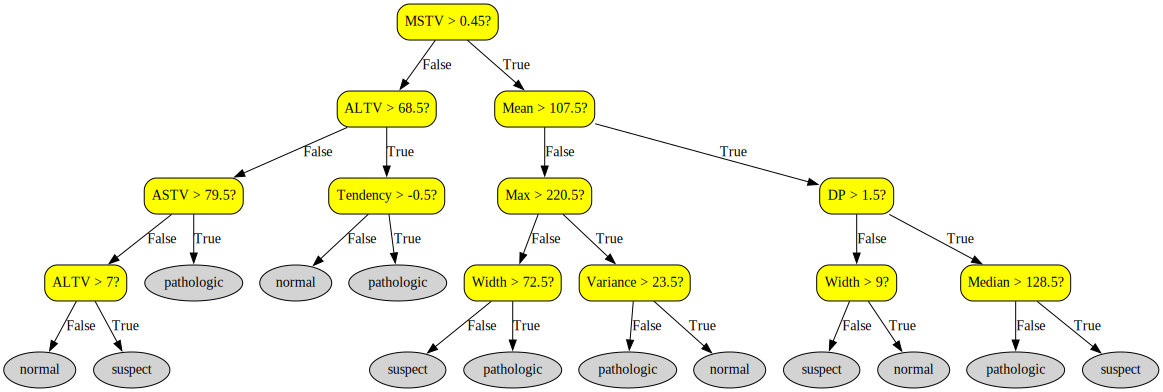

In [54]:
printClassifiers(treeCrossAccuracy)

clf4 = clfs[4]
clf4.fit(Xtrain, Ytrain)
print("\nVisual Tree when depth=4")
clf4.draw_tree()

# Task 3
Prediciting Apartment Prices

In [55]:
# Read the CSV file using Pandas.
alldata = pd.read_csv("assets/sberbank.csv")

# Convert the timestamp string to an integer representing the year.
def get_year(timestamp):
    return int(timestamp[:4])
alldata['year'] = alldata.timestamp.apply(get_year)

# Select the 9 input columns and the output column.
selected_columns = ['price_doc', 'year', 'full_sq', 'life_sq', 'floor', 'num_room', 'kitch_sq', 'full_all']
alldata = alldata[selected_columns]
alldata = alldata.dropna()

# Shuffle.
alldata_shuffled = alldata.sample(frac=1.0, random_state=0)

# Separate the input and output columns.
X = alldata_shuffled.drop('price_doc', axis=1)
# For the output, we'll use the log of the sales price.
Y = alldata_shuffled['price_doc'].apply(np.log)

# Split into training and test sets.
X3train, X3test, Y3train, Y3test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [56]:
X3train.head()

,year,full_sq,life_sq,floor,num_room,kitch_sq,full_all
11619,2013,76,45.0,9.0,3.0,10.0,76284
11300,2013,56,30.0,8.0,2.0,12.0,91100
20241,2014,38,22.0,3.0,2.0,6.0,57405
21320,2014,48,32.0,5.0,2.0,8.0,85083
27572,2015,62,62.0,2.0,1.0,1.0,39873


In [64]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_validate
m1 = DummyRegressor()
cross_validate(m1, X3train, Y3train, scoring='neg_mean_squared_error')

{'fit_time': array([0.00199795, 0.00199771, 0.00199962, 0.00100112, 0.00100112]),
 'score_time': array([0.00100279, 0.00100112, 0.00099897, 0.00099945, 0.00099921]),
 'test_score': array([-0.39897319, -0.37113485, -0.38083108, -0.39057156, -0.40475168])}

In [127]:
import sklearn as SK
import warnings

def evalAndAppendRegressor(writedict, reg, suffix=""):
    with warnings.catch_warnings():
        warnings.filterwarnings('error', category=SK.exceptions.ConvergenceWarning)
        warnings.filterwarnings('error', category=SK.exceptions.FitFailedWarning)
        try:
            scorelist = cross_val_score(reg, X3train, Y3train, scoring='neg_mean_squared_error')
            score = mean(scorelist)
        except (TypeError, ValueError, Warning) as e:
            score = f"Could not compute ({type(e).__name__})"
    methodName = f"{type(reg).__name__}"
    if len(suffix)>0:
        methodName += f" ({suffix})"
    writedict[methodName] = score

In [163]:
regScores = {}

In [164]:
evalAndAppendRegressor(regScores, DummyRegressor())

In [165]:
evalAndAppendRegressor(regScores, SK.linear_model.Ridge())

In [166]:
evalAndAppendRegressor(regScores, SK.linear_model.Ridge())

In [167]:
evalAndAppendRegressor(regScores, SK.linear_model.Lasso())

In [168]:
evalAndAppendRegressor(regScores, SK.tree.DecisionTreeRegressor(max_depth=1), suffix="depth:1")
evalAndAppendRegressor(regScores, SK.tree.DecisionTreeRegressor(max_depth=2), suffix="depth:2")
evalAndAppendRegressor(regScores, SK.tree.DecisionTreeRegressor(max_depth=4), suffix="depth:4")
evalAndAppendRegressor(regScores, SK.tree.DecisionTreeRegressor(max_depth=8), suffix="depth:8")
evalAndAppendRegressor(regScores, SK.tree.DecisionTreeRegressor(max_depth=16), suffix="depth:16")
evalAndAppendRegressor(regScores, SK.tree.DecisionTreeRegressor(max_depth=32), suffix="depth:32")

In [169]:
evalAndAppendRegressor(regScores, SK.ensemble.RandomForestRegressor())
evalAndAppendRegressor(regScores, SK.ensemble.RandomForestRegressor(n_estimators=10), suffix="estimators:10")
evalAndAppendRegressor(regScores, SK.ensemble.RandomForestRegressor(n_estimators=100), suffix="estimators:100")

In [170]:
evalAndAppendRegressor(regScores, SK.ensemble.GradientBoostingRegressor())
evalAndAppendRegressor(regScores, SK.ensemble.GradientBoostingRegressor(max_depth=1), suffix="depth:1")
evalAndAppendRegressor(regScores, SK.ensemble.GradientBoostingRegressor(max_depth=3), suffix="depth:3")
evalAndAppendRegressor(regScores, SK.ensemble.GradientBoostingRegressor(max_depth=6), suffix="depth:6")

In [171]:
evalAndAppendRegressor(regScores, SK.neural_network.MLPRegressor())
evalAndAppendRegressor(regScores, SK.neural_network.MLPRegressor(hidden_layer_sizes=(20,)), suffix="20 neurons")
evalAndAppendRegressor(regScores, SK.neural_network.MLPRegressor(hidden_layer_sizes=(35,)), suffix="35 neurons")
evalAndAppendRegressor(regScores, SK.neural_network.MLPRegressor(hidden_layer_sizes=(50,)), suffix="50 neurons")
evalAndAppendRegressor(regScores, SK.neural_network.MLPRegressor(hidden_layer_sizes=(200,)), suffix="200 neurons")
evalAndAppendRegressor(regScores, SK.neural_network.MLPRegressor(hidden_layer_sizes=[100,50,10,50,100]), suffix="100-50-10-50-100")
evalAndAppendRegressor(regScores, SK.neural_network.MLPRegressor(hidden_layer_sizes=[100,50,100]), suffix="100-50-100")
evalAndAppendRegressor(regScores, SK.neural_network.MLPRegressor(hidden_layer_sizes=[100]), suffix="1 layer")

In [172]:
def getRegressorAccuracy(kv):
    k, v = kv
    if isinstance(v, int) or isinstance(v, float) :
        return v
    else:
        return float("-inf")

def printRegressors(regs):
    maxKeyStrLen = max([len(x) for x in regs.keys()])

    for k,v in sorted(regs.items(), key=getRegressorAccuracy, reverse=True):
        kf = f"{{:<{maxKeyStrLen}}}".format(k)
        print(f"{kf} -> {v}")

### Examples Regressors Results


In [173]:
printRegressors(regScores)

GradientBoostingRegressor (depth:6)    -> -0.25934437253588155
GradientBoostingRegressor              -> -0.264512687436728
GradientBoostingRegressor (depth:3)    -> -0.26454842306284304
GradientBoostingRegressor (depth:1)    -> -0.27984569212049737
RandomForestRegressor                  -> -0.2831489213662228
RandomForestRegressor (estimators:100) -> -0.2832435711280098
DecisionTreeRegressor (depth:4)        -> -0.2855494394343464
DecisionTreeRegressor (depth:8)        -> -0.28724606372066225
Lasso                                  -> -0.3010470671748872
Ridge                                  -> -0.30139784232179745
DecisionTreeRegressor (depth:2)        -> -0.3043367605680858
RandomForestRegressor (estimators:10)  -> -0.30669774022142643
DecisionTreeRegressor (depth:1)        -> -0.32967650508193563
DummyRegressor                         -> -0.38925247260237567
DecisionTreeRegressor (depth:16)       -> -0.4111514574906903
DecisionTreeRegressor (depth:32)       -> -0.5295684435274248
M

Gradient Boosting is seemingly once again a good technique for this task.

Using default Hyperparameters as the different tuning made little difference.

In [174]:
from sklearn.metrics import mean_squared_error

regr = SK.ensemble.GradientBoostingRegressor()  
regr.fit(X3train, Y3train)
mean_squared_error(Y3test, regr.predict(X3test))

0.27141326547642114

The mean squared error for the test sample became ~0.271, this very close to the mse cross val score for the training set (~0.265). 

Thus we can conclude Gradient Boosting is a good classifier for the data and it isn't overtrained on the test data.